# Amazon customer analysis

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
con=sqlite3.connect('E:\databasse\database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [32]:
df=pd.read_sql_query('SELECT* FROM  Reviews',con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.apply(lambda x:len(x.unique()))  # unique element in each columns

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218418
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295744
Text                      393579
dtype: int64

In [8]:
[col for col in df.columns if df[col].isna().any()]  # columns with missing column

[]

In [9]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
from textblob import TextBlob

In [11]:
df.Summary[0]
TextBlob(df.Summary[0]).sentiment.polarity

0.7

# perform sentiment analysis

In [12]:
# perform sentiment analysis
polarity=[]
for item in df.Summary:
    try:
        polarity.append(TextBlob(item).sentiment.polarity)
    except:
        polarity.append(0)


In [13]:
len(polarity)

568454

In [14]:
data=df.copy()

In [15]:
data['polarity']=polarity
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0


# EDA for positive sentiment

In [16]:
data_positive=data[data.polarity>0]
data_positive.shape

(331665, 11)

In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
text_positive=' '.join(data_positive['Summary'])

In [19]:
len(text_positive)

8465012

In [20]:
import re
total_text=re.sub('[^a-zA-Z]',' ',text_positive)

In [21]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [22]:
total_text=re.sub('\s+',' ',total_text)
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

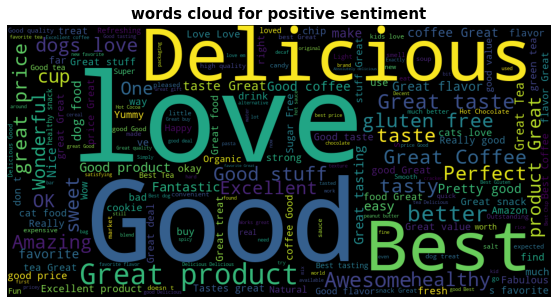

In [23]:
from wordcloud import WordCloud
stopwords=set(STOPWORDS)
x=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(x)
plt.axis('off')
plt.title('words cloud for positive sentiment',fontsize=15,fontweight='bold');


# EDA for negative sentiment

In [24]:

data_negative=data[data.polarity<0]
data_negative.shape

(52516, 11)

In [25]:
text_negative=' '.join(data_negative['Summary'])

In [26]:
len(text_negative)

1438541

In [27]:
total_text1=re.sub('[^a-zA-Z]',' ',text_negative)
total_text1[:1000]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [28]:
total_text1=re.sub('\s+',' ',total_text1)
total_text1[0:10000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

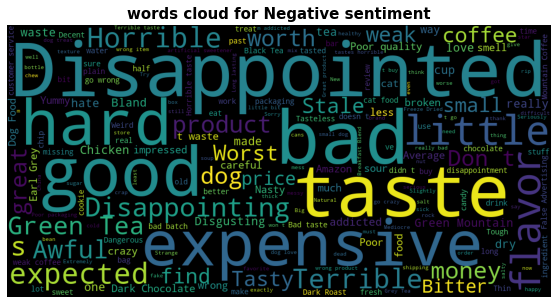

In [29]:
stopwords=set(STOPWORDS)
x1=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text1)
plt.figure(figsize=(15,5))
plt.imshow(x1)
plt.axis('off')
plt.title('words cloud for Negative sentiment',fontsize=15,fontweight='bold');


# to which types of user does amazon can recommend more product ?

In [30]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [31]:
df['UserId'].nunique()

256059

In [32]:
raw_df=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',
                                                                                                            ascending=False)
raw_df

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [33]:
raw_df.columns=['No. of Summary','Num_text','Avg_score','No of product purchased']
raw_df

,No. of Summary,Num_text,Avg_score,No of product purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [34]:
user_10=raw_df.index[:10]

In [35]:
num_10=raw_df['No of product purchased'][:10]

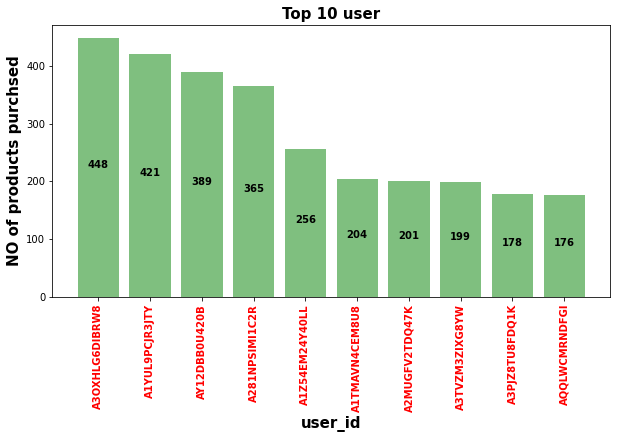

In [36]:
plt.figure(figsize=(10,5))
plt.bar(user_10,num_10,label='most recommended users',color='green',alpha=0.5)
plt.xlabel('user_id',fontweight='bold',fontsize=15)
plt.ylabel('NO of products purchsed',fontweight='bold',fontsize=15)
plt.title('Top 10 user',fontsize=15,fontweight='bold')
for i in range(len(user_10)):
        plt.text(i, num_10[i]//2,num_10[i], ha = 'center',fontweight='bold',color='black')
    
plt.xticks(rotation='vertical',fontweight='bold',color='red');

So, these are our top 10 user_id,who purchase product.so amazon should target such user.

# Analyse length of the commets given by the customer ?

In [37]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
#check for duplication
df.duplicated().sum()

0

In [39]:
df.Text.apply(lambda x:len(x.split(' '))).sort_values(ascending=False)

290807    3526
455393    3526
496753    3526
68700     2640
541158    2233
          ... 
80655        6
156286       5
234392       4
453668       3
168550       3
Name: Text, Length: 568454, dtype: int64

In [40]:
df['text_length']=df.Text.apply(lambda x:len(x.split(' ')))
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'text_length'],
      dtype='object')

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


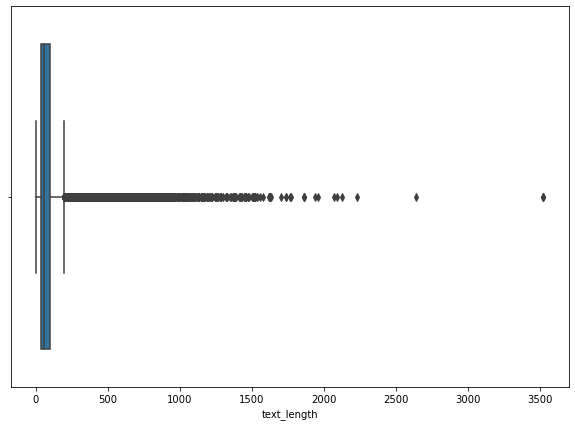

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(df.text_length);

so, many user are giving  lengthy feeedback

# Analyse score

In [42]:
df2=df.Score.value_counts()
df2

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

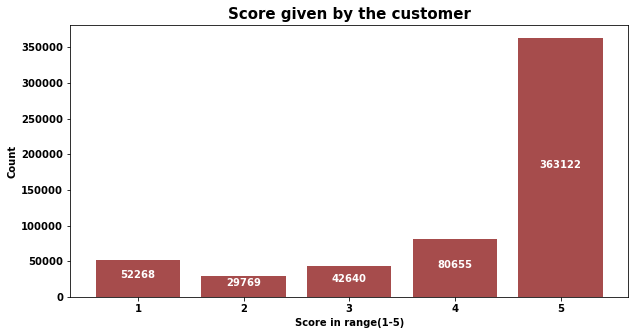

In [43]:
x =df2.index
y =df2
      
# setting figure size by using figure() function 
plt.figure(figsize = (10,5))
for i in range(len(x)):
        plt.text(i+1, y[i+1]//2,y[i+1], ha = 'center',fontweight='bold',color='white')
    
    # making the bar chart on the data with color red
plt.bar(x, y, color = 'maroon',alpha=0.7)
plt.xlabel('Score in range(1-5)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Score given by the customer',fontsize=15,fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold');


So,most of the user gives 5 score